# Loan Approval Prediction Using Machine Learning 


## Overview

Loan approval prediction is a data-driven approach to assessing an applicant's eligibility for a loan based on key financial and demographic factors. This project leverages historical loan data to develop a predictive model using machine learning algorithms. By analyzing attributes such as income, credit score, employment status, education, and loan amount, the model aims to accurately classify loan applications as approved or rejected.

The dataset includes features like applicant income, marital status, gender, credit history, loan amount, loan status, and employment details. The goal is to improve decision-making for financial institutions, reduce default risks, and streamline the loan approval process by automating and optimizing assessments.

## Objective 
 
This project aims to predict whether a loan applicant will be approved or rejected based on key financial and demographic features.  
By leveraging machine learning, we can help financial institutions make data-driven lending decisions, reduce risks, and optimize processes. 

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading the dataset and viewing the first 5 rows
df = pd.read_csv(r"C:\Users\JimmyCharo\Downloads\Loan Approval Prediction\loan_prediction.csv", index_col=0)
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
# Check for the dataset information. We can also see the datatypes from this.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
# Drop the Loan_ID column
df.drop(columns=["Loan_ID"], inplace=True)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Check the extent of null values as I noticed they were present
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### The data has missing values in some of the categorical columns and some numerical columns. We can look at the descriptive statitistics before filling in the missing values.

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Fill missing values in categorical columns with mode. (Mode is appropriate when dealing with categorical data)
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace=True)
df.fillna({'Married': df['Married'].mode()[0]}, inplace=True)
df.fillna({'Dependents': df['Dependents'].mode()[0]}, inplace=True)
df.fillna({'Self_Employed': df['Self_Employed'].mode()[0]}, inplace=True)

In [11]:
# Filling missing values in numerical columns depends on some factors
# Fill missing values in LoanAmount with the median. Median is an appropriate measure when dealing with skewed distributions or when outliers are present.
df.fillna({'LoanAmount': df['LoanAmount'].median()}, inplace=True)

# Fill missing values in Loan_Amount_Term with the mode. The term of the loan amount is a discrete value, therefore the mode is an appropriate metric.
df.fillna({'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0]}, inplace=True)

# Fill missing values in Credit_History with the mode. Since it is a binary variable (0 or 1), the mode is appropriate.
df.fillna({'Credit_History': df['Credit_History'].mode()[0]}, inplace=True)

## Exploratory Data Analysis

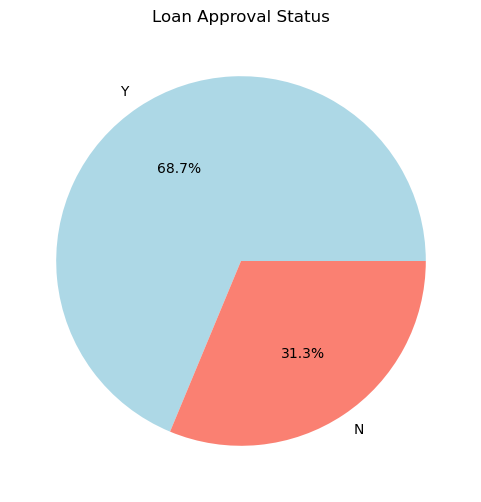

In [13]:
# Look at the distribution of the loan status column
loan_status_count = df['Loan_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Loan Approval Status')
plt.show()

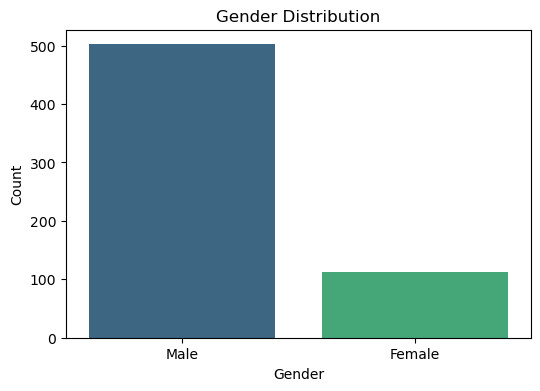

In [14]:
# Look at the distribution of the gender column
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_count.index, y=gender_count.values, hue=gender_count.index, palette='viridis', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

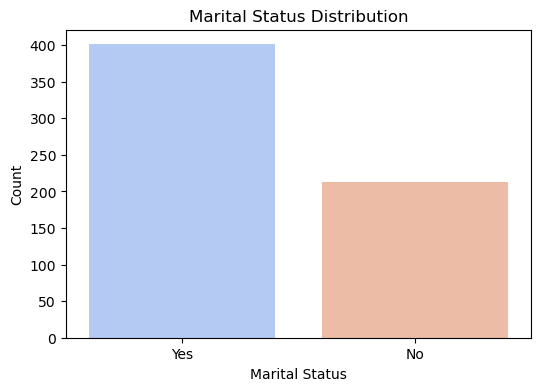

In [15]:
# Look at the distribution of the marital status column
married_count = df['Married'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=married_count.index, y=married_count.values, hue=married_count.index, palette='coolwarm', legend=False)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

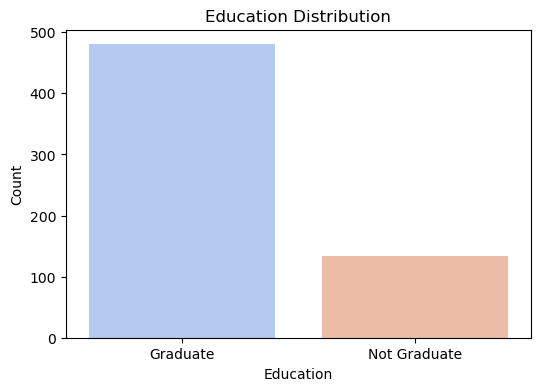

In [16]:
# Look at the distribution of the education column
education_count = df['Education'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=education_count.index, y=education_count.values, hue=education_count.index, palette='coolwarm', legend=False)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

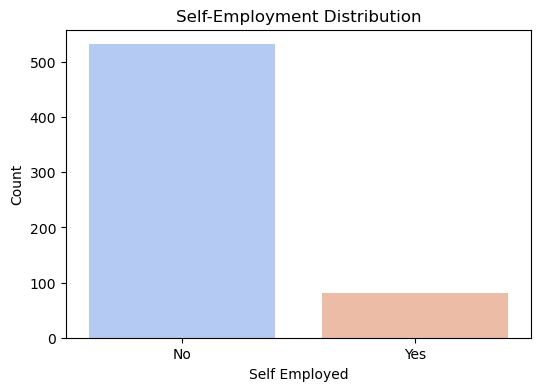

In [17]:
# Look at the distribution of the self-employment column
self_employed_count = df['Self_Employed'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=self_employed_count.index, y=self_employed_count.values, hue=self_employed_count.index, palette='coolwarm', legend=False)
plt.title('Self-Employment Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

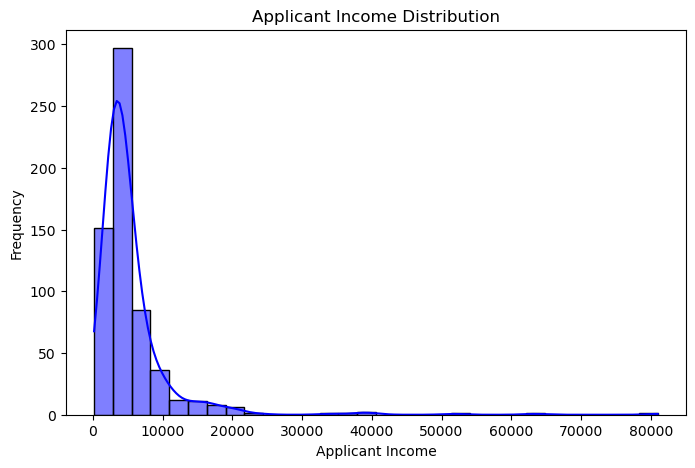

In [18]:
# Look at the distribution of the Applicant Income column
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='blue')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


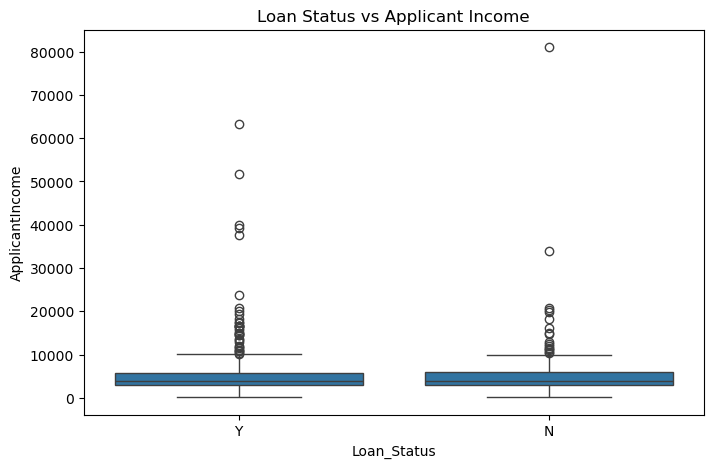

In [19]:
# Look at the relationship between applicant income and loan status.
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Loan Status vs Applicant Income')
plt.show()

#### The "ApplicantIncome" column contains outliers that need to be removed.

In [21]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

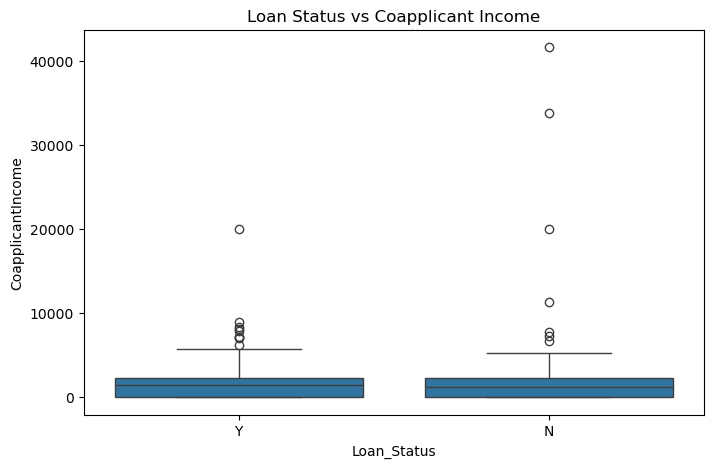

In [24]:
# Look at the relationship between the income of the loan co-applicant and the loan status.
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Loan Status vs Coapplicant Income')
plt.show()

#### The "CoapplicantIncome" column contains outliers that need to be removed.

In [26]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

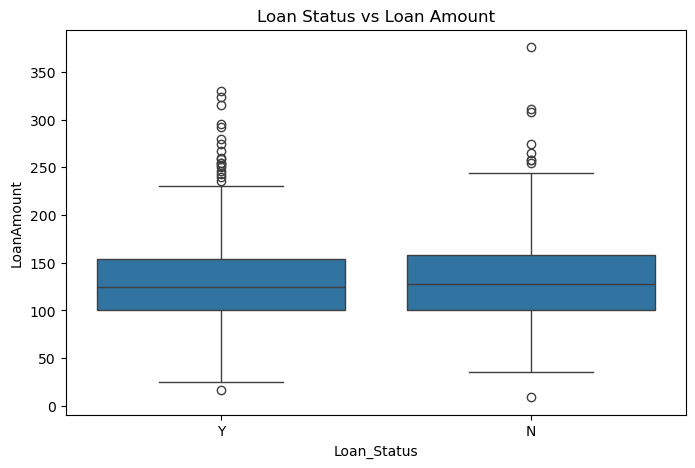

In [29]:
# Look at the relationship between loan amount and loan status.
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Status vs Loan Amount')
plt.show()

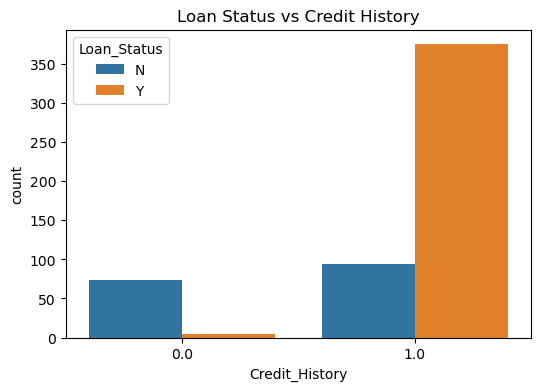

In [30]:
# Look at the relationship between credit history and loan status.
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status vs Credit History')
plt.show()

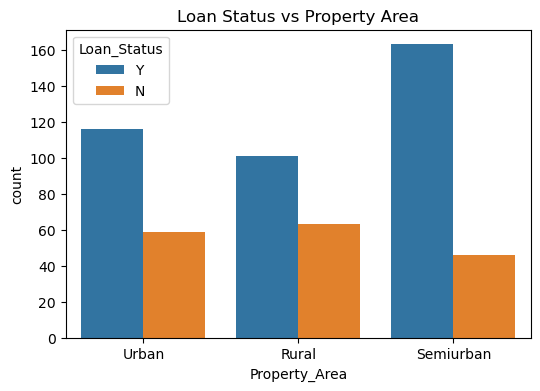

In [31]:
# Look at the relationship between property area and loan status.
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status vs Property Area')
plt.show()

## Data Preparation and Training the Model

In this step, we will:
1. Convert categorical columns into numerical ones
2. Split the data into training and test sets
3. Scale the numerical features
4. Train the loan approval prediction model

In [34]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

In [35]:
# Split the dataset into features(x) and target(y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [39]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

In [40]:
# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.983772          0.305159   
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
277        0.402248          False         True       False         True   
84         0.402248          False         True       False         True   
275        0.402248          False         True       False         True   
392        0.402248          False         True       False         True   
537        0.402248          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
277          True  ...       

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")  # Shows accuracy as a percentage

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix to visualize errors
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           N       0.94      0.49      0.64        35
           Y       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110

Confusion Matrix:
 [[17 18]
 [ 1 74]]


  ### Model Performance Review  
- **Precision for rejected loans (N)** = 94% - Model is very confident when it predicts a rejection.  
- **Recall for rejected loans (N)** = 49% - Model **misses** many actual rejections.  
- **Precision for approved loans (Y)** = 80% - Model sometimes misclassifies approvals.  
- **Recall for approved loans (Y)** = 99% - Model correctly captures almost all actual approvals.
  
### What does it mean?
- The model is **too optimistic** and tends to approve loans too easily.  
- It struggles with detecting **actual rejected loans**, which can be risky for lenders.  
- We should **adjust decision thresholds** or **try different models** to reduce false positives.

# Final Summary & Recommendations  

### Key Findings  
- The **model achieved 83% accuracy**, meaning it correctly predicts most loan approvals and rejections.  
- **Credit history and applicant income** were the most influential factors in loan approval.  
- The dataset is **imbalanced**, with more loan approvals than rejections, leading to **lower recall for rejected loans**.  

### Areas for Improvement  
- **Balance the dataset** – Implement **SMOTE** or adjust class weights to improve recall for rejected loans.  
- **Try alternative models** – Test **Random Forest, XGBoost**, or **Logistic Regression** for better performance.  
- **Optimize hyperparameters** – Fine-tune the **SVM model** for better generalization.  
- **Deploy the model** – Convert it into an API using **Flask or FastAPI** for real-world applications. 